In [126]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [127]:
#PCA
#load dataset into Pandas DataFrame
#df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
framhrt_df=pd.read_csv("framingham.csv")
#framhrt_df.drop(['education'],axis=1,inplace=True)
framhrt_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#from sklearn.preprocessing import StandardScaler
#features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
#x = df.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
#x = StandardScaler().fit_transform(x)

#row=['sex','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp',
     #'diabetes','totChol','BMI','heartRate','glucose','sysBP','diaBP']

from sklearn.preprocessing import StandardScaler
features = ['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp',
     'diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']
# Separating out the features
x = framhrt_df.loc[:, features].values
# Separating out the target
y = framhrt_df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


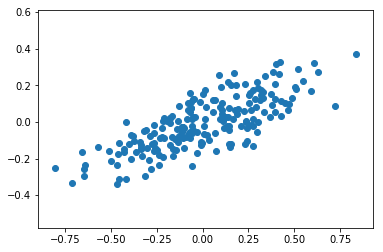

In [131]:
framhrt_df=np.random.RandomState(1)
#rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [119]:
#The fit learns some quantities from the data, most importantly the "components" and "explained variance"

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [120]:
print(pca.components_)

[[-0.74746283 -0.66430363]
 [-0.66430363  0.74746283]]


In [117]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


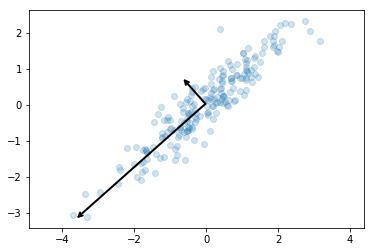

In [121]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [122]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


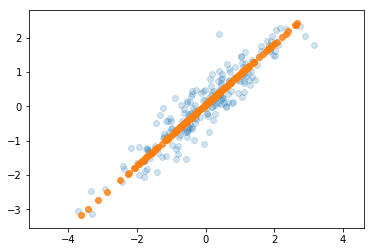

In [123]:
#The light points are the original data, while the orange points are the projected version
#leaves only the component(s) of the data with the highest variance
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape



In [125]:
# Loading the dataframe using pandas
#data = pd.read_csv('Desktop\Train_data.csv')
framhrt_df=pd.read_csv("framingham.csv")

# Dataframe dimensions
#rows, columns = data.shape
rows, columns = framhrt_df.shape         #framhrt_df

In [57]:
framhrt_df.isnull().sum()
#heart_df.isnull().sum()

RANDID         0
SEX            0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
TIME           0
PERIOD         0
HDLC        8600
LDLC        8601
DEATH          0
ANGINA         0
HOSPMI         0
MI_FCHD        0
ANYCHD         0
STROKE         0
CVD            0
HYPERTEN       0
TIMEAP         0
TIMEMI         0
TIMEMIFC       0
TIMECHD        0
TIMESTRK       0
TIMECVD        0
TIMEDTH        0
TIMEHYP        0
dtype: int64